In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
!pip install tensorflow


  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=56035666c09b18294afd4ec9175091369197d53bb7961839f227c716b6794a61
  Stored in directory: c:\users\393172\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=066e1a70d2e1a14f8c8a533a2843c301ea28c3c9e8290fa117faab0daf898bf6
  Stored in directory: c:\users\393172\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)


In [114]:
import tensorflow as tf

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('bank.csv')

In [117]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [118]:
#Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [119]:
# Checking for null values in the columns
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [120]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [121]:
# Dropping columns not required for modelling
df_model = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df_model.shape

(10000, 11)

In [122]:
df_model.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


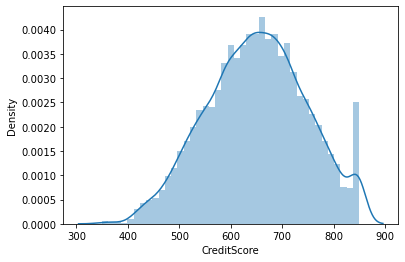

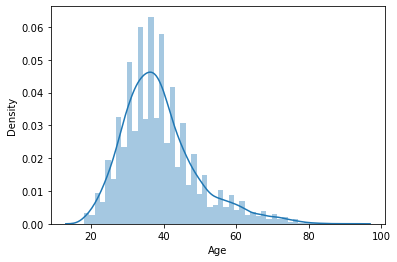

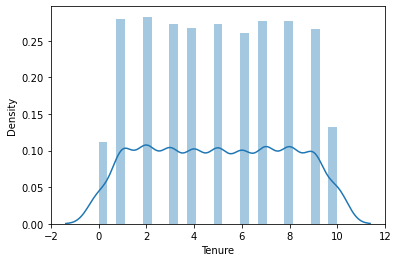

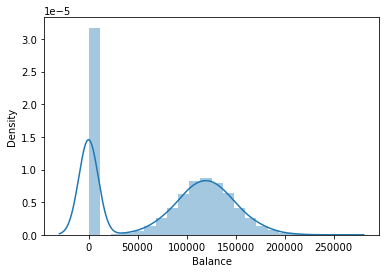

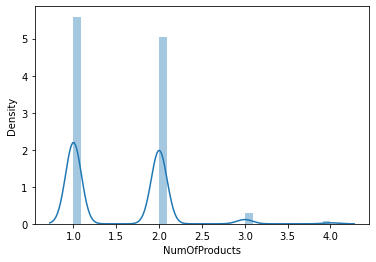

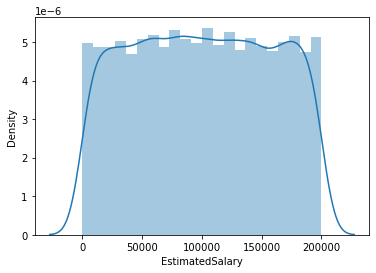

In [123]:
#Univariate Distribution
for value in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    sns.distplot(df_model[value], kde = True)
    plt.show()

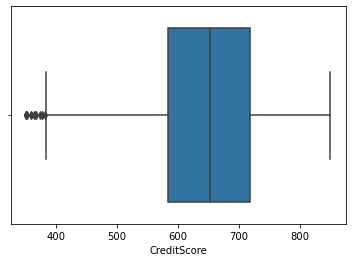

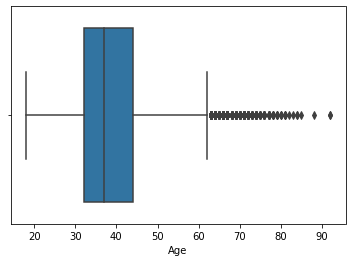

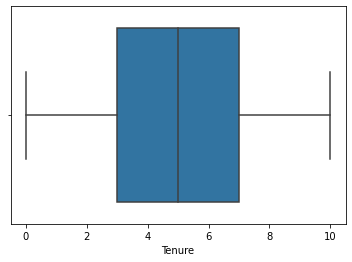

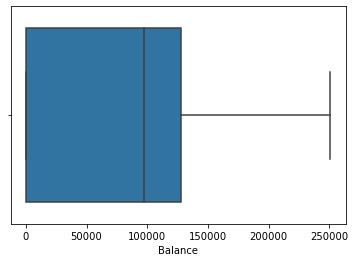

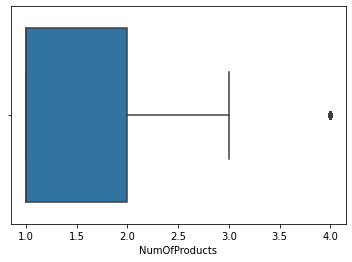

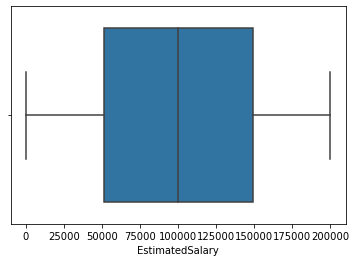

In [124]:
# Checking for outliers
for value in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    sns.boxplot(df_model[value])
    plt.show()

In [125]:
#Treating outliers using capping
Q1 = df_model.quantile(0.25)
Q3 = df_model.quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

In [126]:
for val in ['CreditScore', 'Age', 'NumOfProducts']:
    df_model[val] = df_model[val].clip(Lower_Fence[val], Upper_Fence[val])

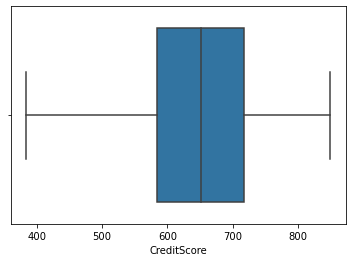

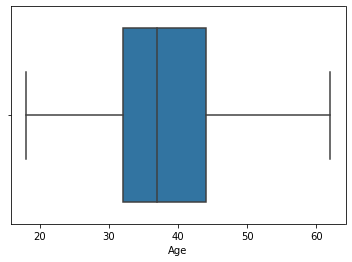

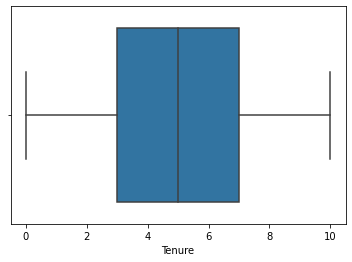

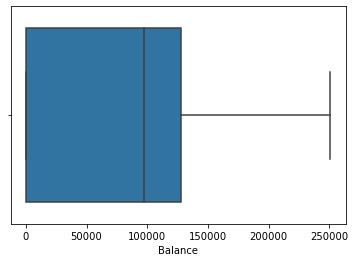

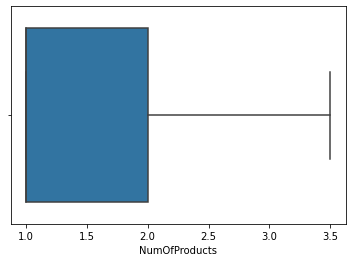

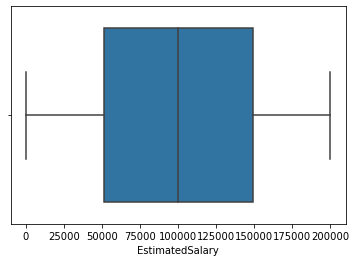

In [127]:
#Outliers are removed
for value in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    sns.boxplot(df_model[value])
    plt.show()

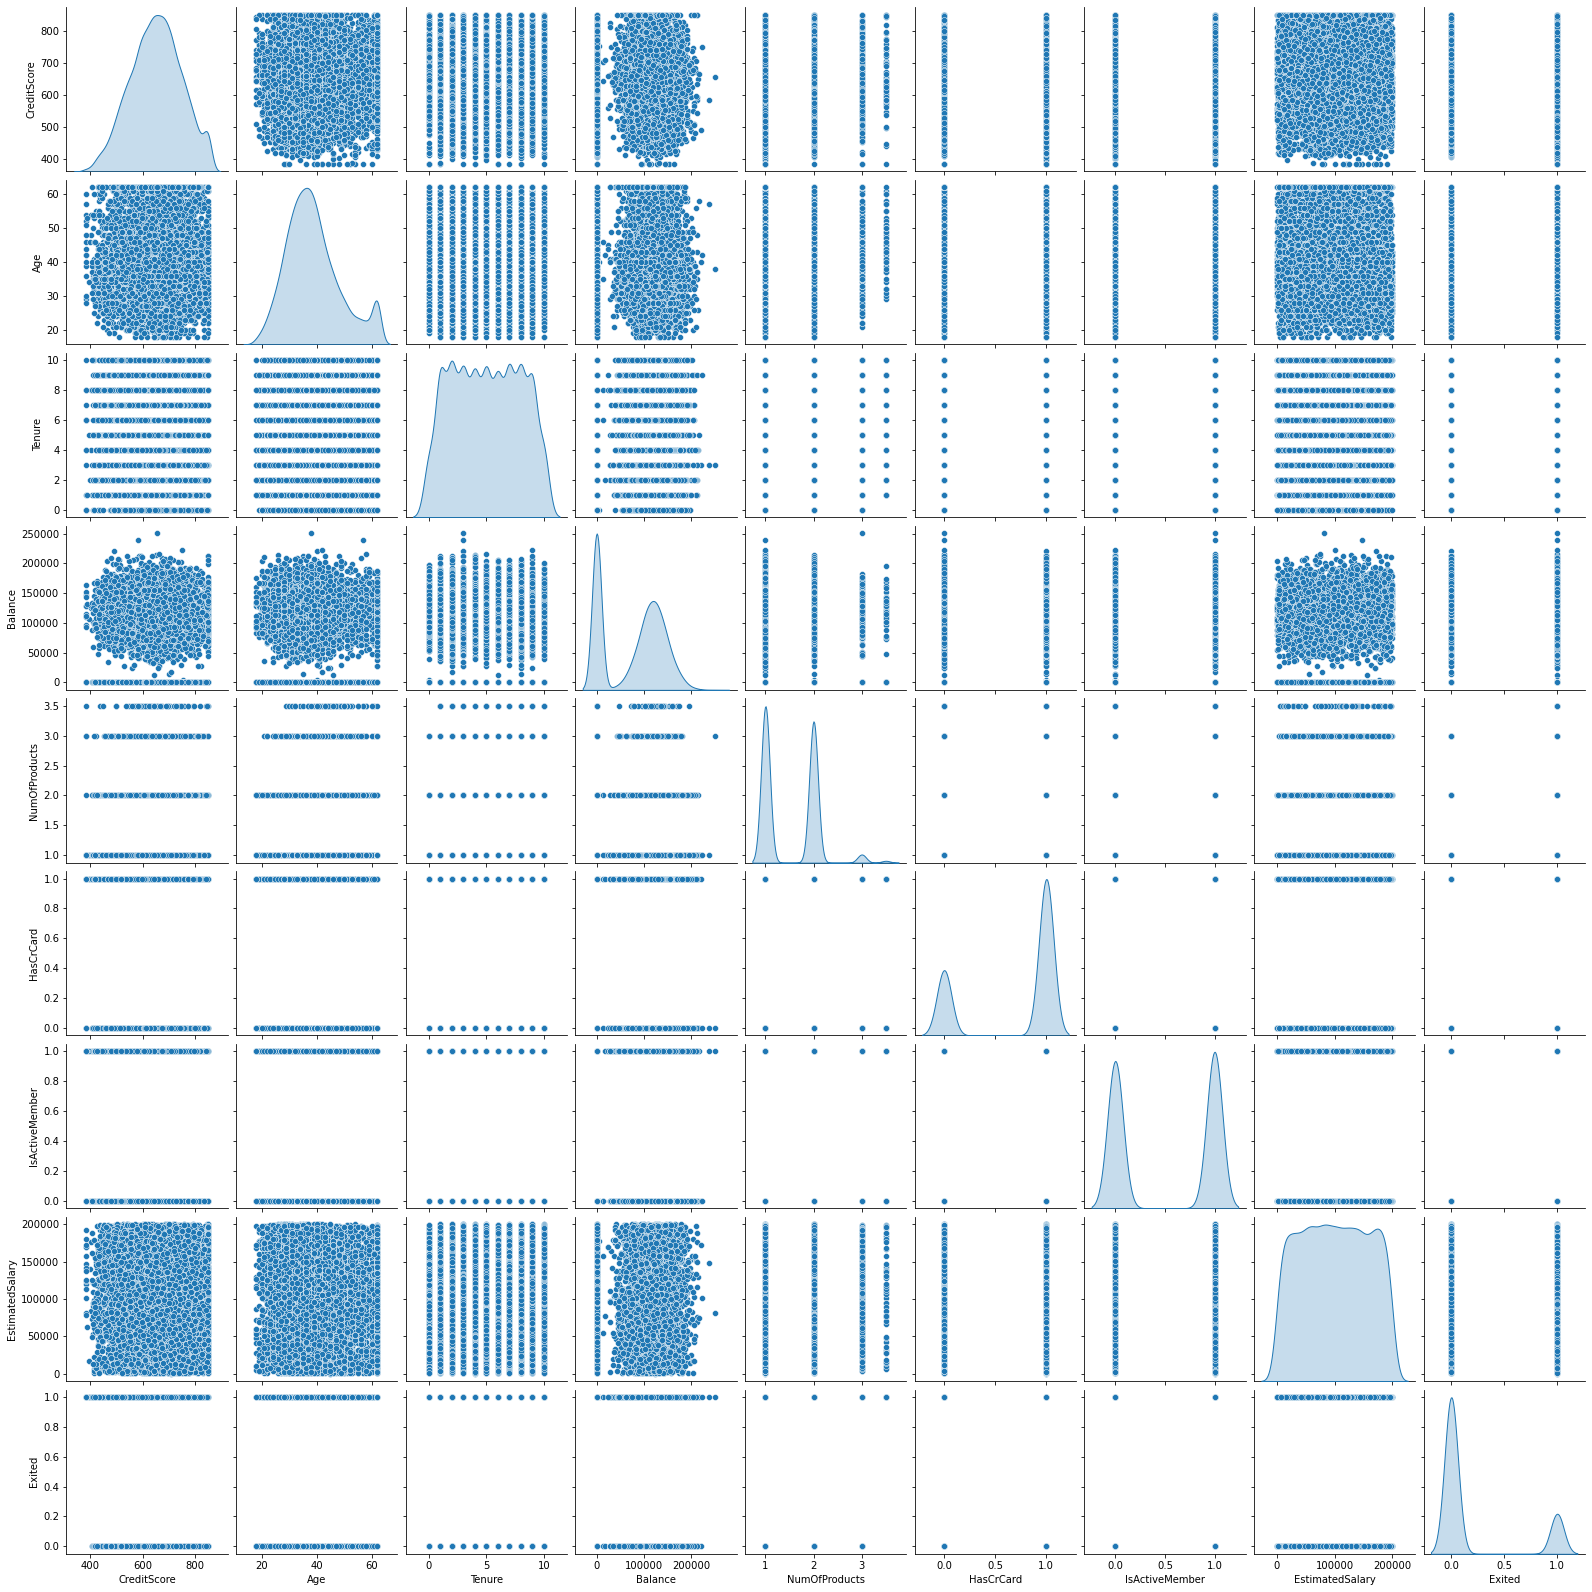

In [128]:
#Bivariate analysis
sns.pairplot(data = df_model, diag_kind='kde')

<AxesSubplot:>

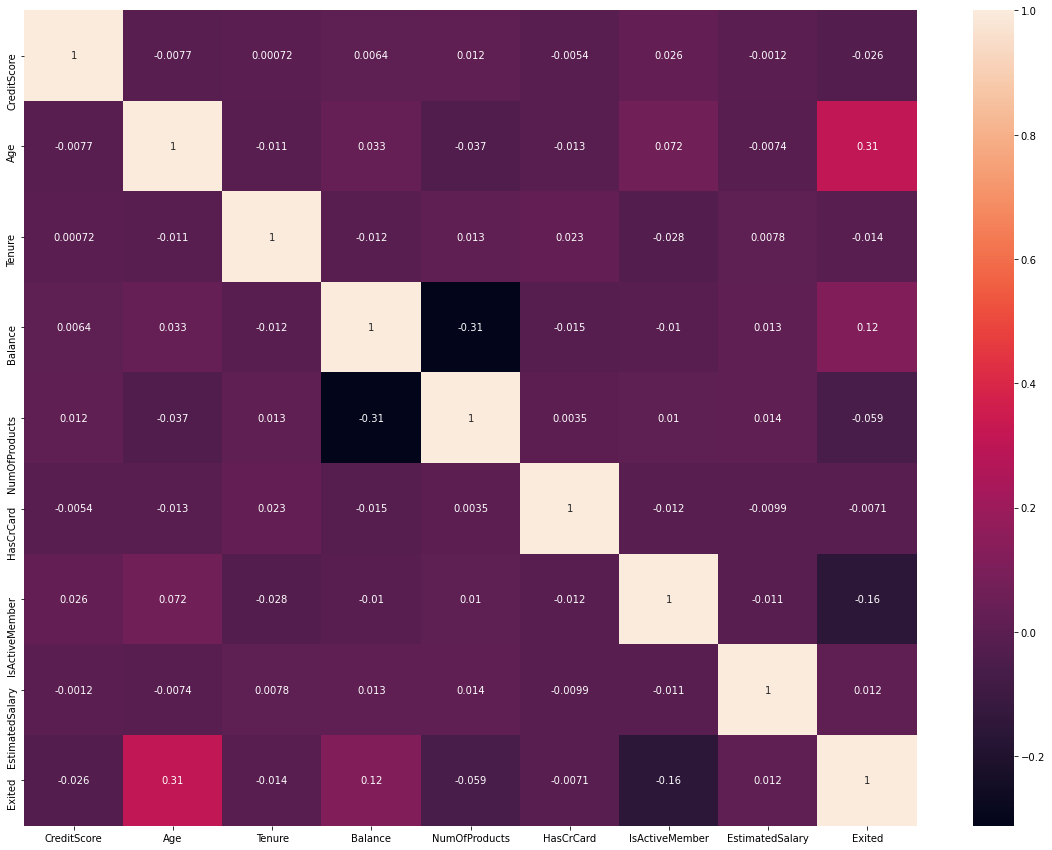

In [129]:
#Corelation between variables check
corr = df_model.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot = True)


**Bivariate Analysis**
- Reading the pair plot and heatmap, there is no colinearity between the variables

In [130]:
#Getting dummy variables for categorical columns
df_model = pd.get_dummies(df_model)
df_model.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1.0,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1.0,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3.0,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2.0,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1.0,1,1,79084.10,0,0,0,1,1,0


In [131]:
#dropping one column for each category
df_model = df_model.drop(columns = ['Geography_France', 'Gender_Male'])
df_model.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Female
0,619,42,2,0.00,1.0,1,1,101348.88,1,0,0,1
1,608,41,1,83807.86,1.0,0,1,112542.58,0,0,1,1
2,502,42,8,159660.80,3.0,1,0,113931.57,1,0,0,1
3,699,39,1,0.00,2.0,0,0,93826.63,0,0,0,1
4,850,43,2,125510.82,1.0,1,1,79084.10,0,0,1,1


In [132]:
#converting the dataset to float
df_model = df_model.astype('float32')

In [133]:
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers

In [134]:
# Creating independent variables
X = df_model.drop(columns = ['Exited'])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Female
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,0.0,0.0,1.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,1.0,1.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,0.0,0.0,1.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,0.0,1.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,1.0,1.0


In [135]:
#Creating depndent variable
y = df_model['Exited']
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float32

In [137]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [138]:
#Scakking the test and train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [139]:
#Shape of testing and trainng data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [427]:
#Creating the model
model = Sequential()

In [428]:
#Adding the dense layes
model.add(Dense(64, input_shape = (11,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [429]:
#Assigning the optimised to perform gradient descent
sgd = optimizers.Adam(lr = 0.001)

In [430]:
#Assigning the calculation of loss and also compiling the model with required metrics
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [431]:
#Printing the summary of the model
model.summary()

Model: "sequential_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_411 (Dense)            (None, 64)                768       
_________________________________________________________________
dense_412 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_413 (Dense)            (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [432]:
#Fitting the model and assigning the training data to history
history = model.fit(X_train, y_train, validation_split = 0.2, batch_size = 800, epochs = 40, verbose = 1)

Epoch 1/40
8/8 [==============================] - 1s 71ms/step - loss: 0.6779 - accuracy: 0.5840 - val_loss: 0.5991 - val_accuracy: 0.7900
Epoch 2/40
8/8 [==============================] - 0s 15ms/step - loss: 0.5798 - accuracy: 0.8023 - val_loss: 0.5427 - val_accuracy: 0.7894
Epoch 3/40
8/8 [==============================] - 0s 15ms/step - loss: 0.5321 - accuracy: 0.7957 - val_loss: 0.5138 - val_accuracy: 0.7894
Epoch 4/40
8/8 [==============================] - 0s 15ms/step - loss: 0.4897 - accuracy: 0.8032 - val_loss: 0.4951 - val_accuracy: 0.7894
Epoch 5/40
8/8 [==============================] - 0s 14ms/step - loss: 0.4766 - accuracy: 0.7965 - val_loss: 0.4789 - val_accuracy: 0.7894
Epoch 6/40
8/8 [==============================] - 0s 15ms/step - loss: 0.4523 - accuracy: 0.8007 - val_loss: 0.4664 - val_accuracy: 0.7912
Epoch 7/40
8/8 [==============================] - 0s 15ms/step - loss: 0.4485 - accuracy: 0.7995 - val_loss: 0.4570 - val_accuracy: 0.7987
Epoch 8/40
8/8 [===========

In [433]:
#Converting traning history into dataframe
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [434]:
#Printing trainng accuracy
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.655301,0.657969,0.599140,0.790000,0
1,0.569143,0.798437,0.542656,0.789375,1
2,0.520636,0.798594,0.513829,0.789375,2
3,0.492617,0.798594,0.495051,0.789375,3
4,0.470251,0.798750,0.478942,0.789375,4
5,0.452060,0.800625,0.466406,0.791250,5
6,0.438998,0.806406,0.456970,0.798750,6
7,0.428060,0.814375,0.450434,0.803125,7
8,0.419742,0.819687,0.445368,0.801875,8
9,0.412743,0.821250,0.441140,0.806875,9


**Model Training Insights**
- Model was trained for 40 epochs and 800 batch size
- Training accuracy is 0.86 and validation accuracy is 0.85
- There is no overfitting seen in the training process

In [435]:
#Evaluvating the model
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8575


In [436]:
#Accuracy in Test Data
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.35343268513679504, 0.8575000166893005]


In [447]:
#Predicting based on 0.5 Threshold
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)


Recall_score: 0.44282238442822386
Precision_score: 0.7647058823529411
F-score: 0.5608628659476117


<AxesSubplot:>

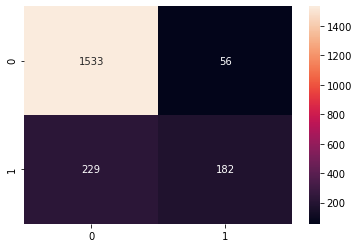

In [448]:
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
cf_matrix  = confusion_matrix(y_test.values, Y_pred_cls)


sns.heatmap(cf_matrix, annot=True, fmt='g')

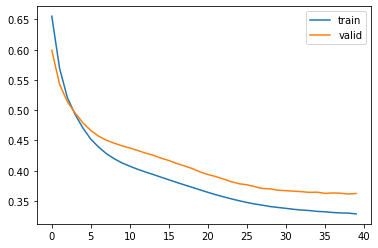

In [439]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

**ANN Model**:
- SGD optimizer had a lower accuracy and recall score. Other optimizers had lower recall scores as compared to Adam
- After trying all the types of optimisers and loss functions, Adam optimiser seemed to give the best results
- Recall needs to be high for the given problem statement as we do not want miss out any prediction on people who have exited to be classified as not exited
- Layers with various number of neurons (6, 10) were tried and the model with 64 neurons in the first layer and 32 neurons in the second came out to be the best
- Other variations such as increasing the number of epochs and also batch sizes were done
- Since the default threshold in set to 0.5, the predict function was used as it is
- The accuracy score came to 0.85